In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import astropy.units as u
from mpdaf.obj import deg2sexa

import numpy as np

from mpdaf.obj import Cube, Spectrum
from mpdaf.drs import PixTable

### <div style="background-color:plum; padding: 5px"><h2>1. SDSSJ1515+1511</h2>

In [10]:
cube1 = Cube('D:\Datacube\SDSSJ1515+1511\ADP.2024-05-27T19_17_04.532.fits')

ima1 = cube1[1842, :, :]

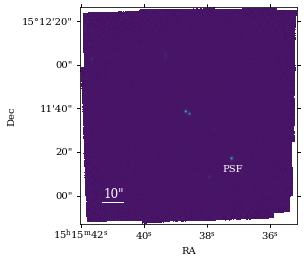

In [11]:
plt.figure()
plt.rcParams['font.family'] = 'serif'

#ima1.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', 
#          use_wcs=True, title = '$\lambda$ = %.1f (%s)' %(cube1.wave.coord(1974), cube1.wave.unit))
ima1.plot(zscale=False, show_xlabel=True, show_ylabel=True, use_wcs=True)

plt.plot([50, 100],[50, 50], lw=1, color='white')
#plt.text(360, 100, 'G2', fontsize=12, color='white', horizontalalignment='center')
plt.text(77, 60, '10"', fontsize=12, color='white', horizontalalignment='center')
plt.text(350, 120, 'PSF', fontsize=10, color='white', horizontalalignment='center')

plt.xlabel('RA')
plt.ylabel('Dec')

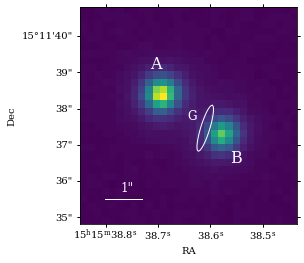

In [15]:
# figsize=(8,8)
plt.figure()

plt.rcParams['font.family'] = 'serif'
#ima1_zoom = cube1[1842, 245:265, 235:255]
ima1_zoom = cube1[1842, 240:270, 231:261]
ima1_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, use_wcs=True)

#plt.plot([27, 27],[22, 26], lw=1, color='white')
plt.plot([3, 8],[3, 3], lw=1, color='white')

plt.text(10, 21, 'A', fontsize=16, color='white', horizontalalignment='center')
plt.text(21, 8, 'B', fontsize=16, color='white', horizontalalignment='center')
plt.text(15, 14, 'G', fontsize=12, color='white', horizontalalignment='center')
plt.text(6, 4, '1"', fontsize=12, color='white', horizontalalignment='center')

# Galaxy
x_center = 16.785          # x-position of ellipse center
y_center = 12.76         # y-position of ellipse center
a = 3.3                 # semi-major axis length
ellipticity = 0.81     # ellipticity = 1 - (b/a)
angle_deg = -17.1 + 90        # in degrees
angle_rad = np.radians(angle_deg)

b = a * (1 - ellipticity)

# Create angle array
theta = np.linspace(0, 2 * np.pi, 300)
# Parametric equation for ellipse before rotation
x = a * np.cos(theta)
y = b * np.sin(theta)
# Rotate ellipse
x_rot = x * np.cos(angle_rad) - y * np.sin(angle_rad)
y_rot = x * np.sin(angle_rad) + y * np.cos(angle_rad)
# Translate to center
x_final = x_rot + x_center
y_final = y_rot + y_center
# Plotting
plt.plot(x_final, y_final, color='white', lw=1)

plt.xlabel('RA')
plt.ylabel('Dec')

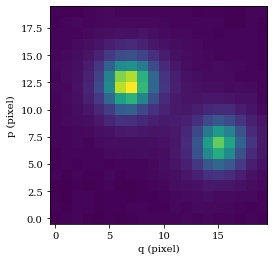

In [10]:
#fig, ax = plt.subplots(1,2, figsize=(10,4))
ima1_zoom = cube1[1842, 245:265, 235:255]
ima1_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, use_wcs=False)

In [10]:
print(cube1[1974, 253, 249]) # Kiri-atas
print(cube1[1974, 253, 251]) # Kanan-atas
print(cube1[1974, 251, 251]) # Kanan-bawah
print(cube1[1974, 251, 249]) # Kiri-bawah

217.08065795898438
239.9147491455078
257.250244140625
247.87750244140625


In [114]:
subcube1 = cube1[:,245:265, 235:255]

#subcube1.mask_region(center=[12, 6], radius=4., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
subcube1.mask_region(center=[6, 15], radius=4., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)

subcube1.crop()
subcube1.shape

(3721, 8, 8)

In [11]:
coord1a = ima1_zoom.wcs.pix2sky((12, 6))
coord1a_2 = ima1_zoom.wcs.pix2sky((13, 7))

coord1b = ima1_zoom.wcs.pix2sky((6, 15))
coord1b_2 = ima1_zoom.wcs.pix2sky((7, 16))

coord1a = (coord1a + coord1a_2) / 2
coord1b = (coord1b + coord1b_2) / 2

coord1asexa = deg2sexa(coord1a)
coord1bsexa = deg2sexa(coord1b)

print(f"A : {coord1asexa}")
print(f"B : {coord1bsexa}")

A : [['15:11:38.40662715' '15:15:38.6967801']]
B : [['15:11:37.20666018' '15:15:38.57243201']]


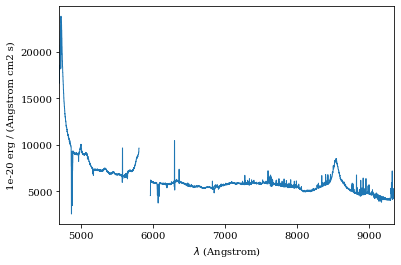

In [115]:
#spec1_A = subcube1.sum(axis=(1,2))
spec1_B = subcube1.sum(axis=(1,2))

#spec1_A.plot()
spec1_B.plot()

In [116]:
#Spectrum.write(spec1_A, 'D:\Datacube\SDSSJ1515+1511\spektrum_sum_SDSSJ1515+1511_A_0.8.fits')
Spectrum.write(spec1_B, 'D:\Datacube\SDSSJ1515+1511\spektrum_sum_SDSSJ1515+1511_B_0.8.fits')

### <div style="background-color:plum; padding: 5px"><h2>2. SDSSJ1320+1644</h2>

In [2]:
cube2 = Cube('D:\Datacube\SDSSJ1320+1644\ADP.2017-09-11T10_03_56.634.fits')

#ima2 = cube2[2735, :, :]
ima2 = cube2[1801, :, :]

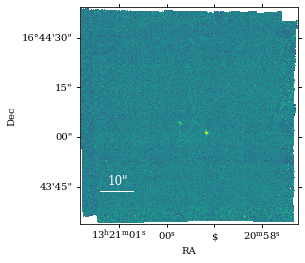

In [3]:
plt.figure()
plt.rcParams['font.family'] = 'serif'

#ima2.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube2.wave.coord(1790), cube2.wave.unit))

ima2.plot(zscale=False, show_xlabel=True, show_ylabel=True, use_wcs=True)

plt.plot([30, 80],[50, 50], lw=1, color='white')

plt.text(57, 60, '10"', fontsize=12, color='white', horizontalalignment='center')

plt.xlabel('RA')
plt.ylabel('Dec')

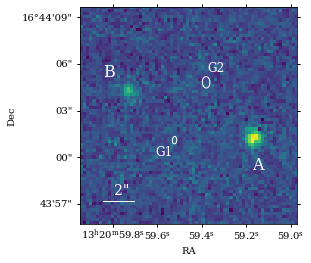

In [17]:
#ima2_zoom = cube2[2735, 120:170, 145:195]
ima2_zoom = cube2[1801, 110:180, 135:205] #1801
# figsize=(6,6)
plt.figure() #
plt.rcParams['font.family'] = 'serif'

#ima2_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube2.wave.coord(1790), cube2.wave.unit))
ima2_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, use_wcs=True)

plt.plot([7, 17],[7, 7], lw=1, color='white')

plt.text(57, 17, 'A', fontsize=16, color='white', horizontalalignment='center')
plt.text(9, 47, 'B', fontsize=16, color='white', horizontalalignment='center')
plt.text(26.5, 21.5, 'G1', fontsize=12, color='white', horizontalalignment='center')
plt.text(43.5, 48.5, 'G2', fontsize=12, color='white', horizontalalignment='center')
plt.text(13, 9, '2"', fontsize=14, color='white', horizontalalignment='center')

# Galaxy 1
x1_center = 55 - (4.991 * 5)          # x-position of ellipse center
y1_center = 26 + (0.117 * 5)        # y-position of ellipse center
a1 = 0.24 * 5                 # semi-major axis length
ellipticity1 = 1 - (0.6)     # ellipticity = 1 - (b/a)
angle_deg1 = -3.6 + 90       # in degrees
angle_rad1 = np.radians(angle_deg1)
b1 = a1 * (1 - ellipticity1)

theta1 = np.linspace(0, 2 * np.pi, 300)
x1 = a1 * np.cos(theta1)
y1 = b1 * np.sin(theta1)
x1_rot = x1 * np.cos(angle_rad1) - y1 * np.sin(angle_rad1)
y1_rot = x1 * np.sin(angle_rad1) + y1 * np.cos(angle_rad1)
x1_final = x1_rot + x1_center
y1_final = y1_rot + y1_center
plt.plot(x1_final, y1_final, color='white', lw=1)

# Galaxy 2
x2_center = 55 - (2.96 * 5)          # x-position of ellipse center
y2_center = 26 + (3.843 * 5)         # y-position of ellipse center
a2 = 0.37 * 5                 # semi-major axis length
ellipticity2 = 1 - (0.66)     # ellipticity = 1 - (b/a)
angle_deg2 = 2.6 + 90       # in degrees
angle_rad2 = np.radians(angle_deg2)
b2 = a2 * (1 - ellipticity2)

theta2 = np.linspace(0, 2 * np.pi, 300)
x2 = a2 * np.cos(theta2)
y2 = b2 * np.sin(theta2)
x2_rot = x2 * np.cos(angle_rad2) - y2 * np.sin(angle_rad2)
y2_rot = x2 * np.sin(angle_rad2) + y2 * np.cos(angle_rad2)
x2_final = x2_rot + x2_center
y2_final = y2_rot + y2_center
plt.plot(x2_final, y2_final, color='white', lw=1)

plt.xlabel('RA')
plt.ylabel('Dec')

In [11]:
subcube2 = cube2[:, 120:170, 145:195]
subcube2.shape

#subcube2.mask_region(center=[16, 45], radius=4., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube2.mask_region(center=[32, 5], radius=4., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)

#subcube2.mask_region(center=[16, 45], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
subcube2.mask_region(center=[32, 5], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)

subcube2.crop()
subcube2.shape

(3681, 6, 6)

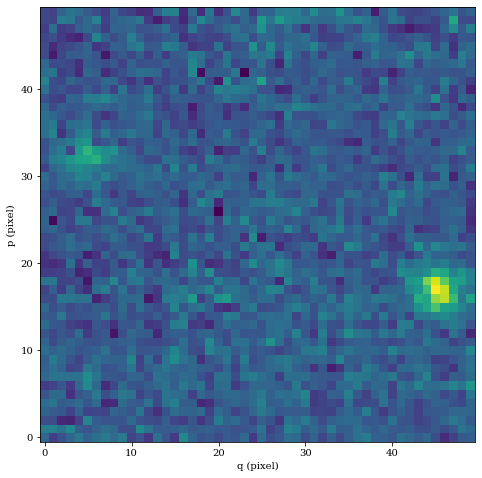

In [10]:
ima2_zoom = cube2[2735, 120:170, 145:195]

plt.figure(figsize=(8,8))
ima2_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True)

In [21]:
coord2a = ima2_zoom.wcs.pix2sky((16, 45))
coord2a_2 = ima2_zoom.wcs.pix2sky((17, 46))

coord2b = ima2_zoom.wcs.pix2sky((32, 5))
coord2b_2 = ima2_zoom.wcs.pix2sky((33, 6))

coord2a = (coord2a + coord2a_2) / 2
coord2b = (coord2b + coord2b_2) / 2

coord2asexa = deg2sexa(coord2a)
coord2bsexa = deg2sexa(coord2b)

print(f"A : {coord2asexa}")
print(f"B : {coord2bsexa}")

A : [['16:44:01.07864965' '13:20:59.16762133']]
B : [['16:44:04.27865198' '13:20:59.72453929']]


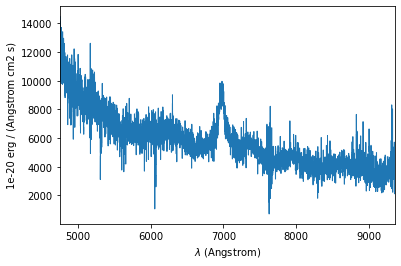

In [12]:
#spec2_A = subcube2.sum(axis=(1,2))
spec2_B = subcube2.sum(axis=(1,2))

#spec2_A.plot()
spec2_B.plot()

In [13]:
#Spectrum.write(spec2_A, 'D:\Datacube\SDSSJ1320+1644\spektrum_sum_SDSSJ1320+1644_A_0.6.fits')
Spectrum.write(spec2_B, 'D:\Datacube\SDSSJ1320+1644\spektrum_sum_SDSSJ1320+1644_B_0.6.fits')

### <div style="background-color:plum; padding: 5px"><h2>3.  WGD2038-4008</h2>

In [18]:
cube3 = Cube('D:\Datacube\WGD2038-4008\ADP.2021-05-17T13_27_36.504.fits')

#ima3 = cube3[1949, :, :]
ima3 = cube3[3338, :, :]

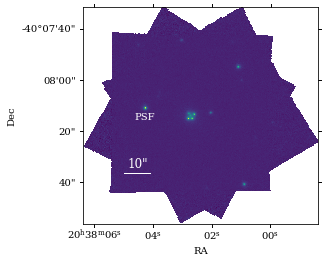

In [19]:
plt.figure()
plt.rcParams['font.family'] = 'serif'

#ima3.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube3.wave.coord(1949), cube3.wave.unit))
ima3.plot(zscale=False, show_xlabel=True, show_ylabel=True, use_wcs=True)

plt.plot([80, 130],[100, 100], lw=1, color='white')
plt.text(107, 110, '10"', fontsize=12, color='white', horizontalalignment='center')
plt.text(120, 205, 'PSF', fontsize=10, color='white', horizontalalignment='center')

plt.xlabel('RA')
plt.ylabel('Dec')

Text(0, 0.5, 'Dec')

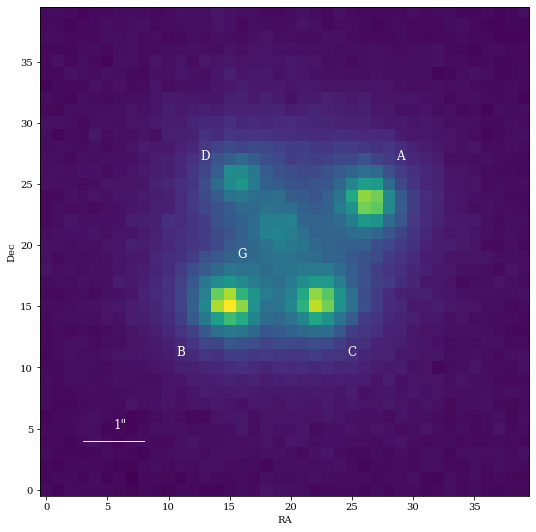

In [20]:
#ima3_zoom = cube3[3338, 200:220, 200:220]
ima3_zoom = cube3[3338, 190:230, 190:230]

plt.figure(figsize=(12,9))
plt.rcParams['font.family'] = 'serif'

#ima3_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube3.wave.coord(1949), cube3.wave.unit))
ima3_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True)

plt.text(29, 27, 'A', fontsize=12, color='white', horizontalalignment='center')
plt.text(11, 11, 'B', fontsize=12, color='white', horizontalalignment='center')
plt.text(25, 11, 'C', fontsize=12, color='white', horizontalalignment='center')
plt.text(13, 27, 'D', fontsize=12, color='white', horizontalalignment='center')
plt.text(16, 19, 'G', fontsize=12, color='white', horizontalalignment='center')

plt.plot([3, 8],[4, 4], lw=1, color='white')
plt.text(6, 5, '1"', fontsize=12, color='white', horizontalalignment='center')

plt.xlabel('RA')
plt.ylabel('Dec')

In [143]:
subcube3 = cube3[:, 190:230, 190:230]
subcube3.shape

(3722, 40, 40)

In [144]:
#subcube3.mask_region(center=[23, 26], radius=4., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube3.mask_region(center=[15, 14], radius=4., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube3.mask_region(center=[15, 22], radius=4., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube3.mask_region(center=[25, 15], radius=4., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
subcube3.mask_region(center=[21, 19], radius=4., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)

subcube3.crop()
subcube3.shape

(3721, 8, 8)

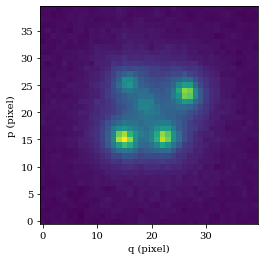

In [31]:
ima3_zoom = cube3[3338, 190:230, 190:230]
ima3_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True)

In [21]:
coord3a = ima3_zoom.wcs.pix2sky((23, 26))
coord3a_2 = ima3_zoom.wcs.pix2sky((24, 27))

coord3b = ima3_zoom.wcs.pix2sky((15, 15))
#coord3b_2 = ima3_zoom.wcs.pix2sky((16, 15))

coord3c = ima3_zoom.wcs.pix2sky((15, 22))
coord3c_2 = ima3_zoom.wcs.pix2sky((16, 23))

coord3d = ima3_zoom.wcs.pix2sky((25, 15))
coord3d_2 = ima3_zoom.wcs.pix2sky((26, 16))

coord3g = ima3_zoom.wcs.pix2sky((21, 19))
coord3g_2 = ima3_zoom.wcs.pix2sky((22, 20))

coord3a = (coord3a + coord3a_2) / 2
#coord3b = (coord3b + coord3b_2) / 2
coord3c = (coord3c + coord3c_2) / 2
coord3d = (coord3d + coord3d_2) / 2
coord3g = (coord3g + coord3g_2) / 2

coord3asexa = deg2sexa(coord3a)
coord3bsexa = deg2sexa(coord3b)
coord3csexa = deg2sexa(coord3c)
coord3dsexa = deg2sexa(coord3d)
coord3gsexa = deg2sexa(coord3g)

print(f"A : {coord3asexa}")
print(f"B : {coord3bsexa}")
print(f"C : {coord3csexa}")
print(f"D : {coord3dsexa}")
print(f"G : {coord3gsexa}")

A : [['-40:08:13.54771094' '20:38:02.60416015']]
B : [['-40:08:15.24771079' '20:38:02.80472657']]
C : [['-40:08:15.14771334' '20:38:02.67392195']]
D : [['-40:08:13.14771123' '20:38:02.79600547']]
G : [['-40:08:13.94771341' '20:38:02.72624367']]


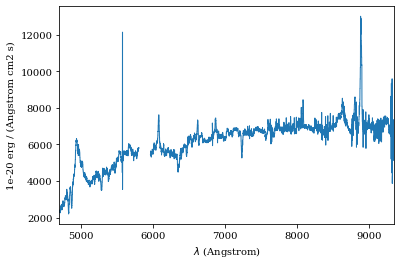

In [145]:
#spec3_A = subcube3.sum(axis=(1,2))
#spec3_B = subcube3.sum(axis=(1,2))
#spec3_C = subcube3.sum(axis=(1,2))
#spec3_D = subcube3.sum(axis=(1,2))
spec3_G = subcube3.sum(axis=(1,2))

#spec3_A.plot()
#spec3_B.plot()
#spec3_C.plot()
#spec3_D.plot()
spec3_G.plot()

In [146]:
#Spectrum.write(spec3_A, 'D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_A_0.8.fits')
#Spectrum.write(spec3_B, 'D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_B_0.8.fits')
#Spectrum.write(spec3_C, 'D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_C_0.8.fits')
#Spectrum.write(spec3_D, 'D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_D_0.8.fits')
Spectrum.write(spec3_G, 'D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_G_0.8.fits')

### <div style="background-color:plum; padding: 5px"><h2>4. 2M1310-1714</h2>

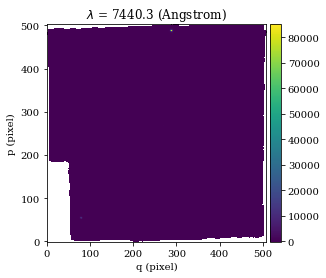

In [12]:
filename = r'D:\Datacube\2M1310-1714\2M.fits'
cube4 = Cube(filename)

ima4 = cube4[2192, :, :]

plt.figure()
ima4.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube4.wave.coord(2192), cube4.wave.unit))
#ima4.plot(zscale=True)

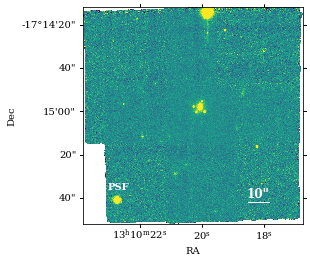

In [11]:
ima4.plot(zscale=True, use_wcs=True)

plt.plot([380, 430],[50, 50], lw=1, color='white')
plt.text(405, 60, '10"', fontsize=12, color='white', fontweight='bold', horizontalalignment='center')

plt.text(80, 80, 'PSF', fontsize=10, color='white', fontweight='bold', horizontalalignment='center')

plt.xlabel('RA')
plt.ylabel('Dec')

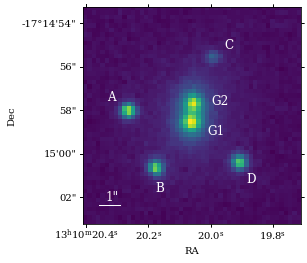

In [77]:
ima4_zoom = cube4[2192, 245:295, 245:295]
ima4_zoom.plot(zscale=False, use_wcs=True)

plt.text(6, 28, 'A', fontsize=12, color='white', horizontalalignment='center')
plt.text(17, 7, 'B', fontsize=12, color='white', horizontalalignment='center')
plt.text(33, 40, 'C', fontsize=12, color='white', horizontalalignment='center')
plt.text(38, 9, 'D', fontsize=12, color='white', horizontalalignment='center')
plt.text(30, 20, 'G1', fontsize=12, color='white', horizontalalignment='center')
plt.text(31, 27, 'G2', fontsize=12, color='white', horizontalalignment='center')

plt.plot([3, 8],[4, 4], lw=1, color='white')
plt.text(6, 5, '1"', fontsize=12, color='white', horizontalalignment='center')

plt.xlabel('RA')
plt.ylabel('Dec')

In [43]:
subcube4 = cube4[:, 250:290, 250:290]
subcube4.shape

(3722, 40, 40)

In [41]:
#subcube4.mask_region(center=[20, 4], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube4.mask_region(center=[7, 11], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube4.mask_region(center=[33, 24], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube4.mask_region(center=[8, 30], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)

#subcube4.mask_region(center=[17, 19], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
subcube4.mask_region(center=[22, 19], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)

subcube4.crop()
subcube4.shape

(3722, 6, 6)

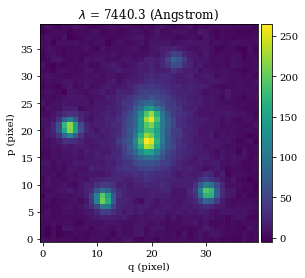

In [44]:
ima4_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube4.wave.coord(2192), cube4.wave.unit))

In [50]:
coord4a = ima4_zoom.wcs.pix2sky((20, 4))
coord4a_2 = ima4_zoom.wcs.pix2sky((21, 5))

coord4b = ima4_zoom.wcs.pix2sky((7, 11))
coord4b_2 = ima4_zoom.wcs.pix2sky((8, 12))

coord4c = ima4_zoom.wcs.pix2sky((33, 24))
coord4c_2 = ima4_zoom.wcs.pix2sky((34, 25))

coord4d = ima4_zoom.wcs.pix2sky((8, 30))
coord4d_2 = ima4_zoom.wcs.pix2sky((9, 31))

coord4g1 = ima4_zoom.wcs.pix2sky((17, 19))
coord4g1_2 = ima4_zoom.wcs.pix2sky((18, 20))

coord4g2 = ima4_zoom.wcs.pix2sky((22, 19))
coord4g2_2 = ima4_zoom.wcs.pix2sky((23, 20))

coord4a = (coord4a + coord4a_2) / 2
coord4b = (coord4b + coord4b_2) / 2
coord4c = (coord4c + coord4c_2) / 2
coord4d = (coord4d + coord4d_2) / 2
coord4g1 = (coord4g1 + coord4g1_2) / 2
coord4g2 = (coord4g2 + coord4g2_2) / 2

coord4asexa = deg2sexa(coord4a)
coord4bsexa = deg2sexa(coord4b)
coord4csexa = deg2sexa(coord4c)
coord4dsexa = deg2sexa(coord4d)
coord4g1sexa = deg2sexa(coord4g1)
coord4g2sexa = deg2sexa(coord4g2)

print(f"A : {coord4asexa}")
print(f"B : {coord4bsexa}")
print(f"C : {coord4csexa}")
print(f"D : {coord4dsexa}")
print(f"G1 : {coord4g1sexa}")
print(f"G2 : {coord4g2sexa}")

A : [['-17:14:58.04443925' '13:10:20.26921153']]
B : [['-17:15:00.64447487' '13:10:20.17148704']]
C : [['-17:14:55.44453327' '13:10:19.98998235']]
D : [['-17:15:00.44455673' '13:10:19.90622156']]
G1 : [['-17:14:58.644512' '13:10:20.05979336']]
G2 : [['-17:14:57.64451201' '13:10:20.05979182']]


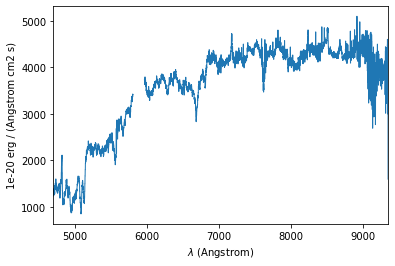

In [42]:
#spec4_A = subcube4.sum(axis=(1,2))
#spec4_B = subcube4.sum(axis=(1,2))
#spec4_C = subcube4.sum(axis=(1,2))
#spec4_D = subcube4.sum(axis=(1,2))

#spec4_G1 = subcube4.sum(axis=(1,2))
spec4_G2 = subcube4.sum(axis=(1,2))

#spec4_A.plot()
#spec4_B.plot()
#spec4_C.plot()
#spec4_D.plot()

#spec4_G1.plot()
spec4_G2.plot()

In [43]:
file_A = r'D:\Datacube\2M1310-1714\spektrum_sum_2M1310-1714_A_0.6.fits'
file_B = r'D:\Datacube\2M1310-1714\spektrum_sum_2M1310-1714_B_0.6.fits'
file_C = r'D:\Datacube\2M1310-1714\spektrum_sum_2M1310-1714_C_0.6.fits'
file_D = r'D:\Datacube\2M1310-1714\spektrum_sum_2M1310-1714_D_0.6.fits'

file_G1 = r'D:\Datacube\2M1310-1714\spektrum_sum_2M1310-1714_G1_0.6.fits'
file_G2 = r'D:\Datacube\2M1310-1714\spektrum_sum_2M1310-1714_G2_0.6.fits'

#Spectrum.write(spec4_A, file_A)
#Spectrum.write(spec4_B, file_B)
#Spectrum.write(spec4_C, file_C)
#Spectrum.write(spec4_D, file_D)

#Spectrum.write(spec4_G1, file_G1)
Spectrum.write(spec4_G2, file_G2)

### <div style="background-color:plum; padding: 5px"><h2>5. RXJ1131-1231</h2>

In [ ]:
cube5 = Cube('D:\Datacube\RXJ1131-1231\ADP.2022-05-16T13_19_42.095.fits')

#ima5 = cube5[2128, :, :]
ima5 = cube5[2468, :, :]

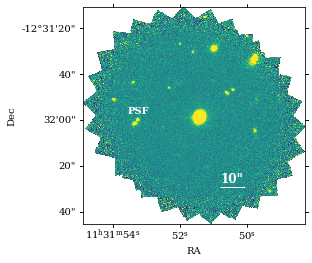

In [18]:
plt.figure()
plt.rcParams['font.family'] = 'serif'

#ima5.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube5.wave.coord(2128), cube5.wave.unit))
ima5.plot(zscale=True, use_wcs=True)

plt.plot([300, 350],[80, 80], lw=1, color='white')
plt.text(325, 90, '10"', fontsize=12, color='white', fontweight='bold', horizontalalignment='center')

plt.text(120, 240, 'PSF', fontsize=10, color='white', fontweight='bold', horizontalalignment='center')

plt.xlabel('RA')
plt.ylabel('Dec')

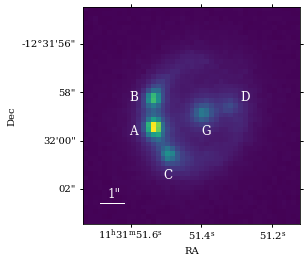

In [19]:
#plt.figure(figsize=(12,9))
plt.figure()
plt.rcParams['font.family'] = 'serif'

ima5_zoom = cube5[2468, 210:255, 230:275]
#ima5_zoom.plot(zscale=False, show_xlabel=True, show_ylabel=True, colorbar='v', title = '$\lambda$ = %.1f (%s)' %(cube5.wave.coord(2128), cube5.wave.unit))
ima5_zoom.plot(zscale=False, use_wcs=True)

plt.text(10, 18, 'A', fontsize=12, color='white', horizontalalignment='center')
plt.text(10, 25, 'B', fontsize=12, color='white', horizontalalignment='center')
plt.text(17, 9, 'C', fontsize=12, color='white', horizontalalignment='center')
plt.text(33, 25, 'D', fontsize=12, color='white', horizontalalignment='center')
plt.text(25, 18, 'G', fontsize=12, color='white', horizontalalignment='center')

plt.plot([3, 8],[4, 4], lw=1, color='white')
plt.text(6, 5, '1"', fontsize=12, color='white', horizontalalignment='center')

plt.xlabel('RA')
plt.ylabel('Dec')

In [20]:
subcube5 = cube5[:,210:250, 230:270]
subcube5.shape

(3722, 40, 40)

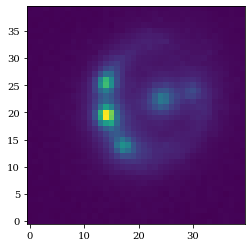

In [24]:
ima5_zoom = cube5[2468, 210:250, 230:270]
ima5_zoom.plot()

In [29]:
#subcube5.mask_region(center=[19, 14], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube5.mask_region(center=[25, 14], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube5.mask_region(center=[13, 17], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
#subcube5.mask_region(center=[24, 30], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)
subcube5.mask_region(center=[22, 24], radius=3., lmin=None, lmax=None, unit_center=None, unit_radius=None, inside=False)

subcube5.crop()
subcube5.shape

(3722, 6, 6)

In [26]:
coord5a = ima5_zoom.wcs.pix2sky((19, 14))
coord5a_2 = ima5_zoom.wcs.pix2sky((20, 15))

coord5b = ima5_zoom.wcs.pix2sky((25, 14))
coord5b_2 = ima5_zoom.wcs.pix2sky((26, 15))

coord5c = ima5_zoom.wcs.pix2sky((13, 17))
coord5c_2 = ima5_zoom.wcs.pix2sky((14, 18))

coord5d = ima5_zoom.wcs.pix2sky((24, 30))
coord5d_2 = ima5_zoom.wcs.pix2sky((25, 31))

coord5g = ima5_zoom.wcs.pix2sky((22, 24))
coord5g_2 = ima5_zoom.wcs.pix2sky((23, 25))

coord5a = (coord5a + coord5a_2) / 2
coord5b = (coord5b + coord5b_2) / 2
coord5c = (coord5c + coord5c_2) / 2
coord5d = (coord5d + coord5d_2) / 2
coord5g = (coord5g + coord5g_2) / 2

coord5asexa = deg2sexa(coord5a)
coord5bsexa = deg2sexa(coord5b)
coord5csexa = deg2sexa(coord5c)
coord5dsexa = deg2sexa(coord5d)
coord5gsexa = deg2sexa(coord5g)

print(f"A : {coord5asexa}")
print(f"B : {coord5bsexa}")
print(f"C : {coord5csexa}")
print(f"D : {coord5dsexa}")
print(f"G : {coord5gsexa}")

A : [['-12:31:59.4589383' '11:31:51.52999744']]
B : [['-12:31:58.2589383' '11:31:51.529997']]
C : [['-12:32:00.65894134' '11:31:51.48902138']]
D : [['-12:31:58.45895002' '11:31:51.31145625']]
G : [['-12:31:58.85894692' '11:31:51.39340915']]


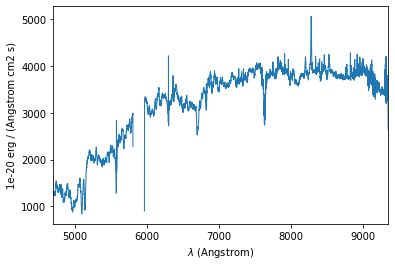

In [30]:
#spec5_A = subcube5.sum(axis=(1,2))
#spec5_B = subcube5.sum(axis=(1,2))
#spec5_C = subcube5.sum(axis=(1,2))
#spec5_D = subcube5.sum(axis=(1,2))
spec5_G = subcube5.sum(axis=(1,2))

#spec5_A.plot()
#spec5_B.plot()
#spec5_C.plot()
#spec5_D.plot()
spec5_G.plot()

In [31]:
#Spectrum.write(spec5_A, 'D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_A_0.6.fits')
#Spectrum.write(spec5_B, 'D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_B_0.6.fits')
#Spectrum.write(spec5_C, 'D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_C_0.6.fits')
#Spectrum.write(spec5_D, 'D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_D_0.6.fits')
Spectrum.write(spec5_G, 'D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_G_0.6.fits')